In [1]:
import cv2
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import skimage

In [21]:
seg_pred = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\preds-test-set\model8_preds\NLDAMPH0005_1_frame80_003.nii.gz')
seg_pred_data = sitk.GetArrayFromImage(seg_pred)[0]

seg_orig = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-2d\nnUNet_raw_data\Task512_CardiacOCT\labelsTs\NLDAMPH0005_1_frame80_003.nii.gz')
seg_orig_data = sitk.GetArrayFromImage(seg_orig)[0]

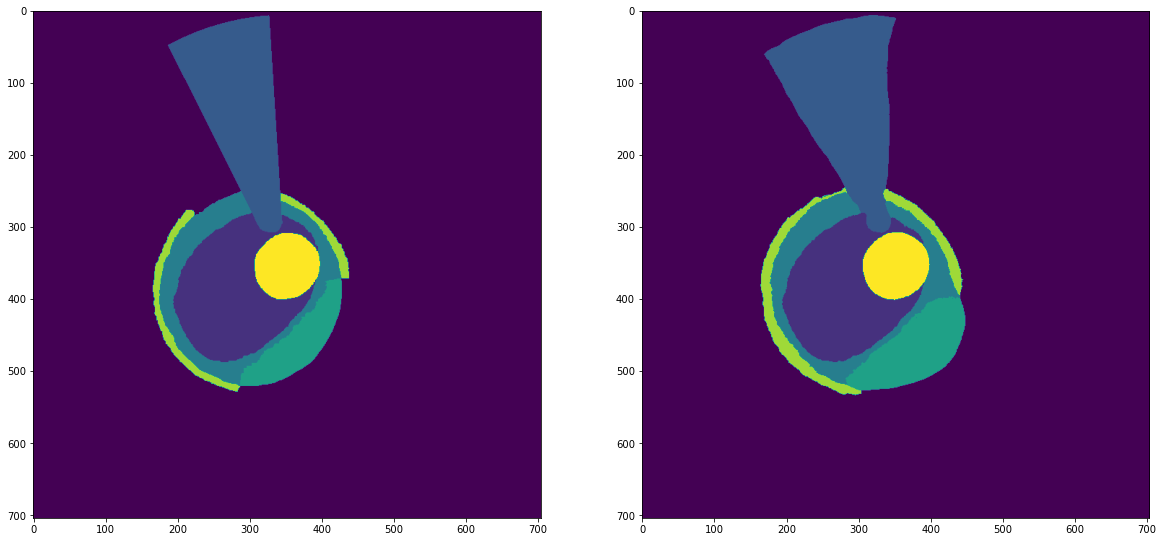

In [23]:
fig, axes = plt.subplots(1,2, figsize=(20,20))

axes[0].imshow(seg_orig_data)
axes[1].imshow(seg_pred_data)

In [37]:
cols, rows = seg_pred_data.shape
to_process = np.zeros((cols, rows))
orig_split = np.zeros((cols, rows))

for col in range(cols):
    for row in range(rows):

        if seg_pred_data[col, row] == 3:
            to_process[col, row] = 3

        elif seg_pred_data[col, row] == 4:
            to_process[col, row] = 4

        elif seg_pred_data[col, row] == 5:
            to_process[col, row] = 5

        elif seg_pred_data[col, row] == 6:
            to_process[col, row] = 6
            
        else:
            to_process[col, row] = 0
            orig_split[col, row] = seg_pred_data[col, row]

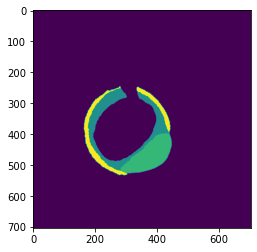

In [34]:
plt.imshow(to_process)

In [35]:
kernel = skimage.morphology.disk(5)

closing = cv2.morphologyEx(to_process, cv2.MORPH_CLOSE, kernel)

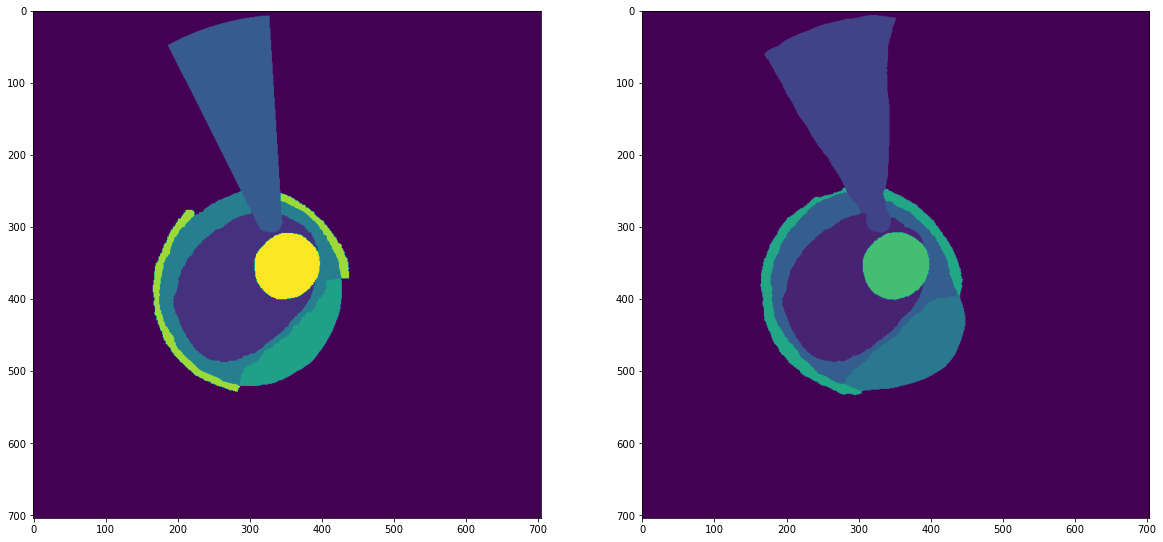

In [38]:
fig, axes = plt.subplots(1,2, figsize=(20,20))

axes[0].imshow(seg_orig_data)
axes[1].imshow(closing + orig_split)